In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,recall_score,precision_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

# Feature Engineering

In [42]:
data=pd.read_csv("Obesity prediction.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["family_history"]=le.fit_transform(data["family_history"])
data["FAVC"]=le.fit_transform(data["FAVC"])
data["CAEC"]=le.fit_transform(data["CAEC"])
data["SMOKE"]=le.fit_transform(data["SMOKE"])
data["SCC"]=le.fit_transform(data["SCC"])
data["CALC"]=le.fit_transform(data["CALC"])
data["MTRANS"]=le.fit_transform(data["MTRANS"])
data["Obesity"]=le.fit_transform(data["Obesity"])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   int64  
 5   FAVC            2111 non-null   int64  
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   int64  
 9   SMOKE           2111 non-null   int64  
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   int64  
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   int64  
 15  MTRANS          2111 non-null   int64  
 16  Obesity         2111 non-null   int64  
dtypes: float64(8), int64(9)
memory us

<Axes: >

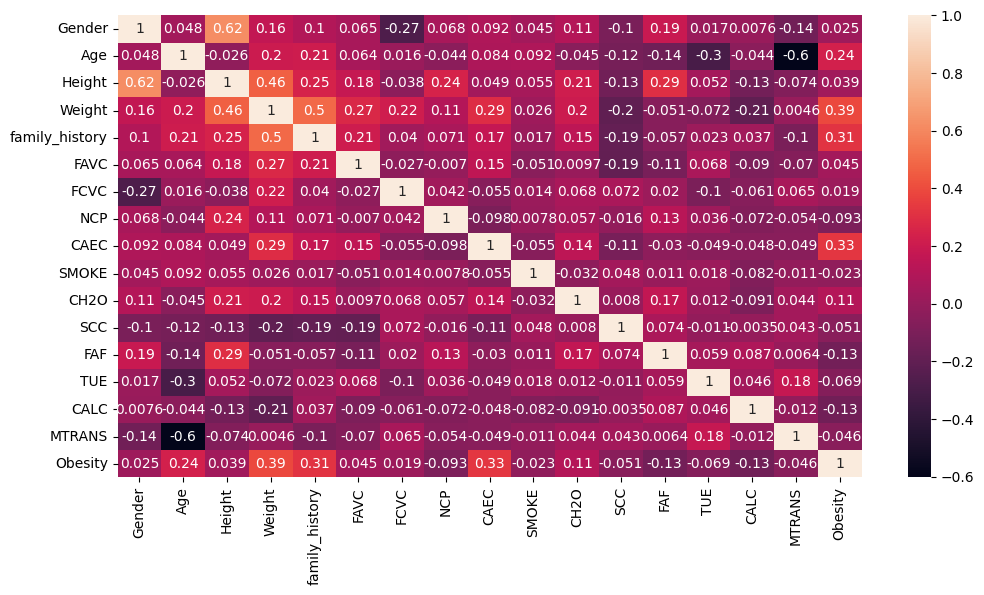

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

# Data Splitting into Training and Testing

In [24]:
ss=StandardScaler()
x=data.drop(["Obesity"],axis=1)
y=data["Obesity"]
x=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# CLassifiers

In [46]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}

# Model Evaluation

In [47]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))

Random Forest Classifier
95.50827423167848
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.95      0.91        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.96      0.96      0.96        50

    accuracy                           0.96       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

Ada Boost Classifier
26.95035460992908
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        56
           1       0.35      0.60      0.44        62
           2       0.16      0.27      0.20        78
           3       0.56      0.09      0.15        58
           4       0.00      0.00      0.00       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/L

In [48]:
results={
    "Classifier":["Random Forest Classifier","Ada Boost Classifier","Decision Tree Classifier"],
    "Accuracy":[95.50,26.30,93.61]
}

In [49]:
results=pd.DataFrame(results)

# Result

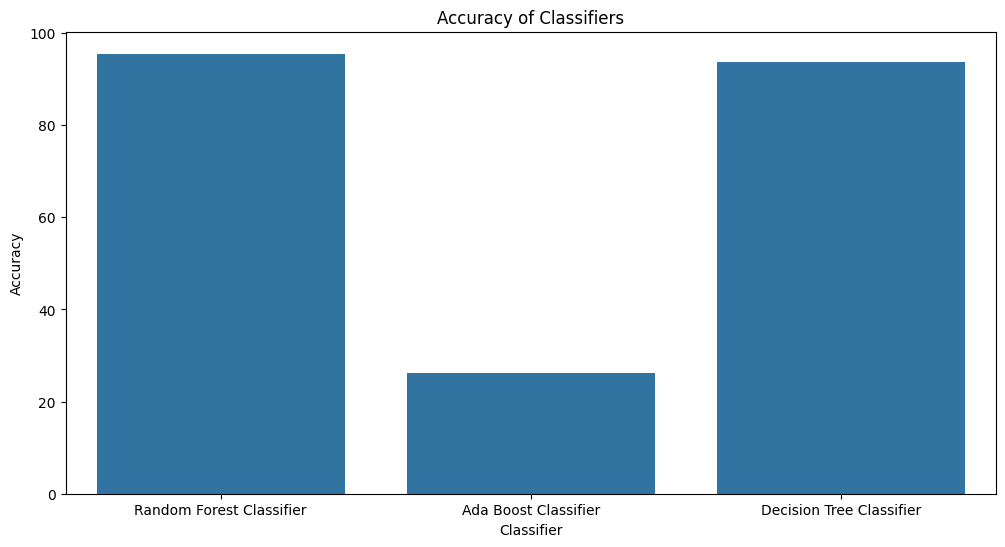

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x="Classifier",y="Accuracy",data=results)
plt.title("Accuracy of Classifiers")
plt.show()